# Concrete Strength Prediction Project

### Objective
#### To predict the strength of concrete using data from the file 'concrete.csv' by applying feature engineering and model tuning in order to obtain 85% to 95% accuracy.

Attribute Information:

Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

In [1]:
#! pip install tabulate

In [2]:
from IPython.display import HTML, display
import tabulate

table = [["Name", "Data Type", "Measurement (kg = kilos, m3 = cubic meters)", "Description"],
         ["Cement (cement)", "quantitative", "kg in a m3 mixture", "Input Variable"],
         ["Blast Furnace Slag (slag)", "quantitative", "kg in a m3 mixture", "Input Variable"],
         ["Fly Ash (ash)", "quantitative", "kg in a m3 mixture", "Input Variable"],
         ["Water(water)", "quantitative", "kg in a m3 mixture", "Input Variable"],
         ["Superplasticizer (superplastic)", "quantitative", "kg in a m3 mixture", "Input Variable"],
         ["Coarse Aggregate (coarseagg)", "quantitative", "kg in a m3 mixture", "Input Variable"],
         ["Fine Aggregate (fineagg)", "quantitative", "kg in a m3 mixture", "Input Variable"],
         ["Age(age)", "quantitative", "Day (1-365)", "Input Variable"],
         ["Concrete compressive strength(strength)", "quantitative", "MPa (Megapascals)", "Output Variable"]]

display(HTML(tabulate.tabulate(table, tablefmt='html')))

Name,Data Type,"Measurement (kg = kilos, m3 = cubic meters)",Description
Cement (cement),quantitative,kg in a m3 mixture,Input Variable
Blast Furnace Slag (slag),quantitative,kg in a m3 mixture,Input Variable
Fly Ash (ash),quantitative,kg in a m3 mixture,Input Variable
Water(water),quantitative,kg in a m3 mixture,Input Variable
Superplasticizer (superplastic),quantitative,kg in a m3 mixture,Input Variable
Coarse Aggregate (coarseagg),quantitative,kg in a m3 mixture,Input Variable
Fine Aggregate (fineagg),quantitative,kg in a m3 mixture,Input Variable
Age(age),quantitative,Day (1-365),Input Variable
Concrete compressive strength(strength),quantitative,MPa (Megapascals),Output Variable


In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn import tree
from os import system


C:\Users\William\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Importing dataset

concrete = pd.read_csv('concrete.csv')

In [5]:
# Displaying first 5 rows

concrete.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [6]:
# Checking datatypes

concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
# Converting 'age' variable to 'float64' datatype

concrete['age'] = concrete['age'].astype('float64')

concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   float64
 8   strength      1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


In [8]:
# Checking shape

concrete.shape

(1030, 9)

### No null values present according to datatypes and shape.

## Exploratory Data Quality Report
### Univariate Analysis

In [9]:
# Displaying statistical summary

concrete.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [10]:
# Checking for duplicates

duplicate = concrete[concrete.duplicated()]

print("Duplicate Rows: ")
duplicate

Duplicate Rows: 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3.0,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3.0,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56.0,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28.0,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91.0,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91.0,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56.0,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28.0,71.30


In [11]:
# Dropping duplicates

concrete = concrete.drop_duplicates()

duplicate = concrete[concrete.duplicated()]

print("Duplicate Rows: ")
duplicate

Duplicate Rows: 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [12]:
# Checking for outliers using z-score
from scipy import stats
z = np.abs(stats.zscore(concrete))

threshold = 3

np.where(z > threshold)

(array([  21,   44,   64,   66,  133,  149,  156,  157,  159,  198,  232,
         256,  262,  263,  270,  291,  296,  311,  321,  359,  391,  444,
         460,  477,  527,  553,  559,  588,  609,  618,  699,  706,  728,
         738,  739,  799,  820,  832,  860,  880,  897,  898,  928,  932,
         934,  966,  970, 1001, 1003], dtype=int64),
 array([1, 4, 7, 3, 7, 7, 4, 7, 7, 7, 4, 7, 7, 3, 7, 4, 7, 7, 7, 7, 7, 7,
        7, 7, 4, 1, 7, 7, 7, 7, 7, 7, 4, 7, 7, 4, 4, 7, 7, 7, 1, 7, 7, 4,
        7, 1, 7, 4, 7], dtype=int64))

In [13]:
# Displaying shape of dataframe with and without outliers

concrete_without = concrete[(z < threshold).all(axis=1)] # Selecting only rows without a single outlier

concrete.shape, concrete_without.shape

((1005, 9), (956, 9))

In [14]:
concrete2 = concrete.copy()

for i,j in zip(np.where(z > threshold)[0], np.where(z > threshold)[1]):
    concrete2.iloc[i,j] = concrete.iloc[:, j].median()

In [15]:
z = np.abs(stats.zscore(concrete2))
np.where(z > threshold)

(array([ 51,  54,  93,  99, 103, 129, 144, 152, 177, 199, 207, 257, 273,
        300, 310, 357, 368, 443, 496, 509, 528, 568, 571, 581, 606, 608,
        628, 682, 707, 759, 794, 839, 843, 879, 927, 947, 961, 992],
       dtype=int64),
 array([7, 4, 7, 7, 7, 4, 7, 7, 4, 7, 7, 4, 4, 7, 7, 7, 7, 4, 4, 4, 7, 7,
        4, 7, 7, 7, 7, 7, 7, 7, 4, 4, 7, 7, 4, 7, 7, 7], dtype=int64))

In [16]:
concrete.shape, concrete2.shape

((1005, 9), (1005, 9))

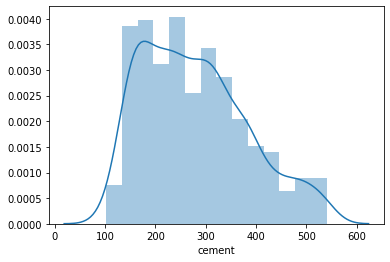

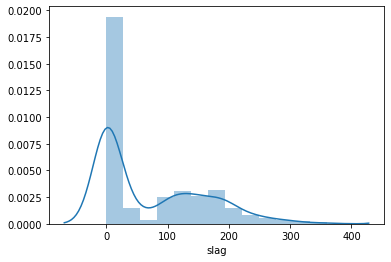

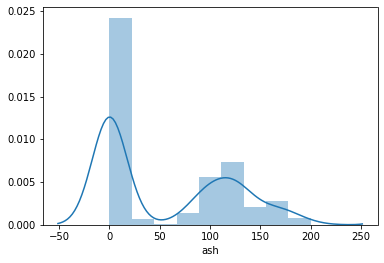

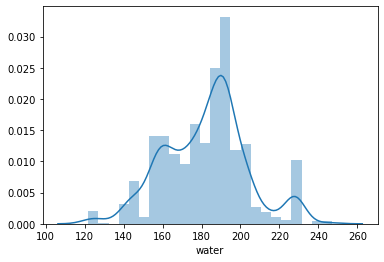

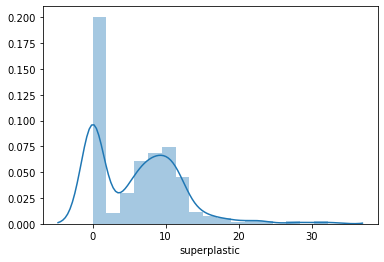

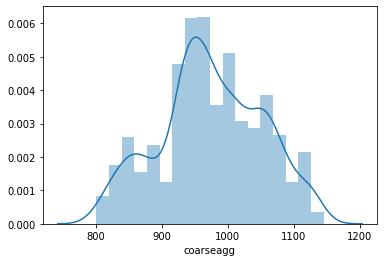

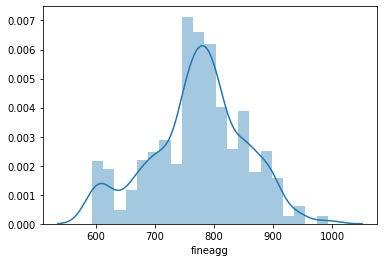

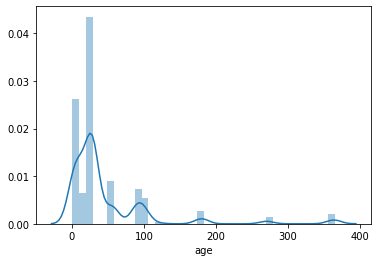

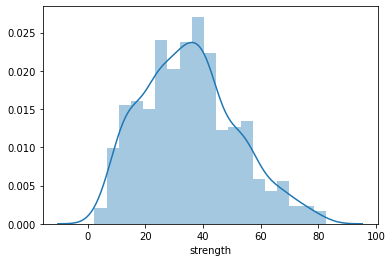

In [17]:
# Visualizing individual variables using seaborn

for i in concrete2.columns:
    sb.distplot(concrete[i])
    plt.show()

### Bivariate Analysis

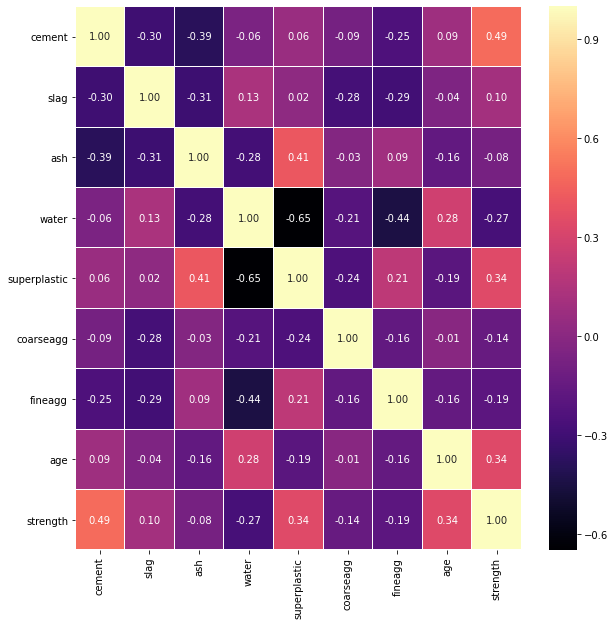

In [18]:
# Displaying correlation heatmap
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(concrete.corr(), ax=ax, annot=True, linewidths=0.05, fmt='.2f', cmap='magma')
plt.show()

In [19]:
# Checking skewness

print("Before removing outliers: ")
print(concrete.skew())
print()
print("After removing outliers: ")
print(concrete2.skew())

Before removing outliers: 
cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age             3.253974
strength        0.395696
dtype: float64

After removing outliers: 
cement          0.564959
slag            0.811762
ash             0.497231
water          -0.004922
superplastic    0.513287
coarseagg      -0.065256
fineagg        -0.252353
age             2.013181
strength        0.395696
dtype: float64


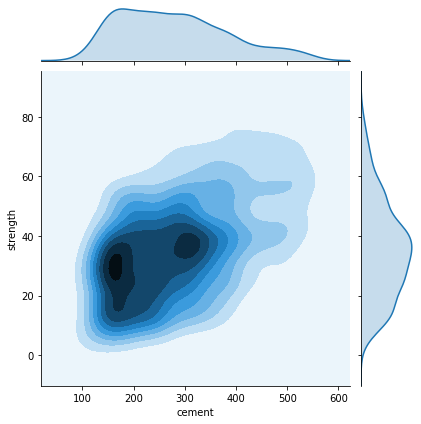

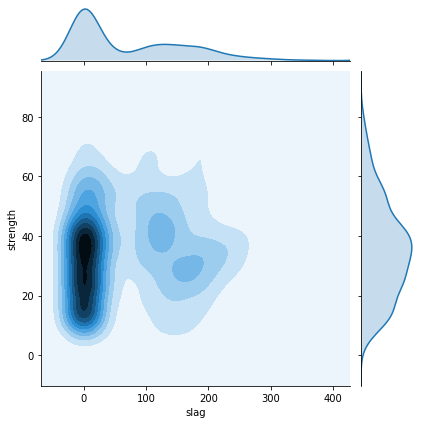

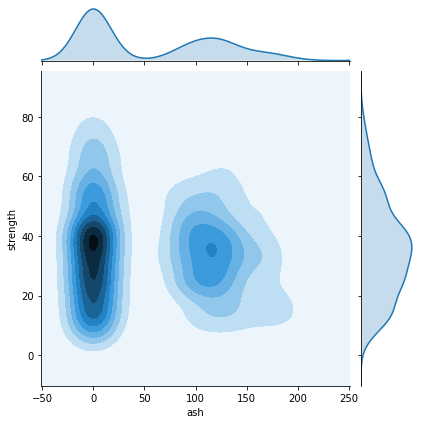

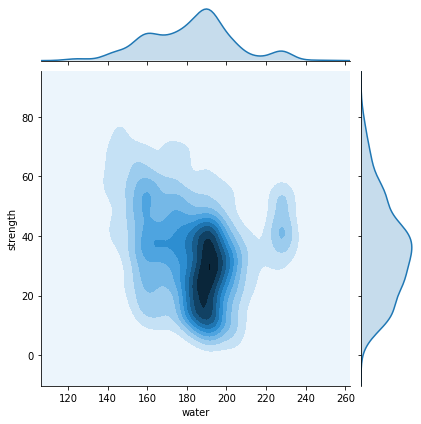

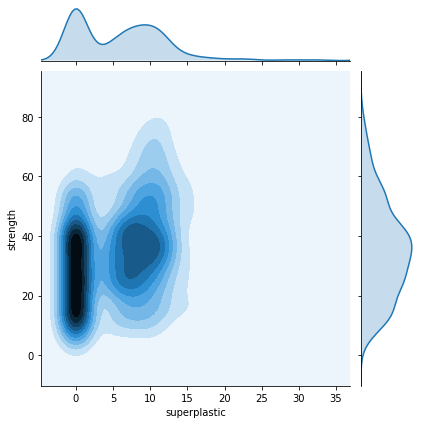

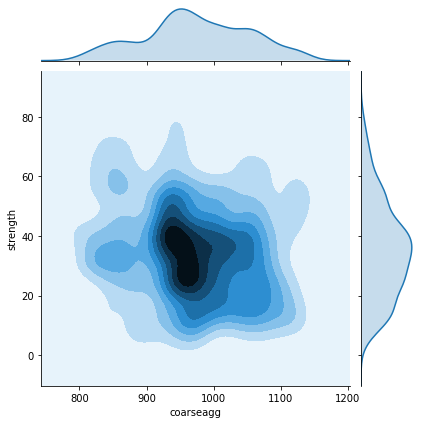

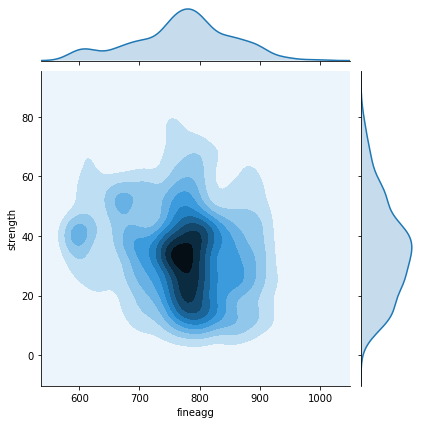

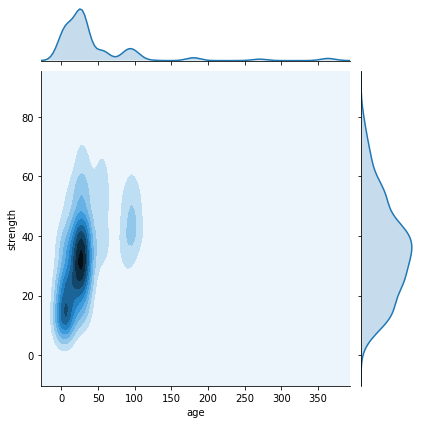

In [20]:
# Displaying boxplots to view relationship between strength variable and other variables

cols = [col for col in concrete.columns if col != 'strength']

for col in cols:
    sb.jointplot(concrete[col], concrete['strength'], kind='kde')
    plt.show()

### Observations:

### Based on the bivariate visualizations, it's difficult to determine much of a relationship between the 'strength' variable and the other variables. There seems to be a positive correlation between the cement and strength variables, and a positively skewed relationship between age and strength. That is, after about 50 days of age, the concrete seems to rapidly lose strength.

### Feature Engineering

In [21]:
# Preparing data model

cols = [col for col in concrete.columns if col != 'strength']
X = concrete[cols]
y = concrete['strength']

X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=7)

In [48]:
X_train_1.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
958,200.0,133.0,0.0,192.0,0.0,965.4,806.2,7.0
127,290.2,193.5,0.0,185.7,0.0,998.2,704.3,7.0
377,289.0,0.0,0.0,192.0,0.0,913.2,895.3,90.0
881,277.1,0.0,97.4,160.6,11.8,973.9,875.6,14.0
721,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,180.0


In [49]:
X_train_1.shape, X_test.shape, y_train_1.shape, y_test.shape

((804, 8), (201, 8), (804,), (201,))

In [50]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((753, 8), (252, 8), (753,), (252,))

In [54]:
# Scaling the training/validation/test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit_transform(X_train)

scaler.fit_transform(X_val)

scaler.fit_transform(X_test)

array([[ 1.01310623, -0.8170186 , -0.8844206 , ..., -0.11434486,
        -0.01307398, -0.25556675],
       [-1.67074726,  1.05166286, -0.8844206 , ..., -0.47616389,
         1.05496416, -0.6051284 ],
       [-0.65035916, -0.8170186 ,  1.85396255, ...,  0.89562479,
         0.09745555, -0.67171157],
       ...,
       [ 0.37099889,  1.62814649, -0.8844206 , ..., -1.59676165,
         1.44492227, -0.6051284 ],
       [ 0.25654471, -0.8170186 , -0.8844206 , ..., -0.08831472,
         0.59545938,  2.27459377],
       [-0.66490842, -0.8170186 ,  1.07740614, ...,  1.43965483,
         0.44022127, -0.48860785]])

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def scoring(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print("Model Performance")
    print("Mean Absolute Error: {:0.4f}.".format(mae))
    print("Mean Squared Error: {:0.4f}.".format(mse))
    print("R^2 Score: {:0.4f}.".format(mae))
    print("Accuracy: {:0.2f}.".format(accuracy))

In [58]:
# Creating baseline performance report

baseline_y = [y_train.median()] * len(y_val)

base_predictions = baseline_y
base_mae = mean_absolute_error(y_val, base_predictions)
base_mse = mean_squared_error(y_val, base_predictions)
base_r2 = r2_score(y_val, base_predictions)
base_errors = abs(base_predictions - y_val)
base_mape = 100 * np.mean(base_errors / y_val)
base_accuracy = 100 - base_mape

print("Model Performance")
print("Mean Absolute Error: {:0.4f}.".format(base_mae))
print("Mean Squared Error: {:0.4f}.".format(base_mse))
print("R^2 Score: {:0.4f}.".format(base_r2))
print("Accuracy: {:0.2f}.".format(base_accuracy))

Model Performance
Mean Absolute Error: 13.2363.
Mean Squared Error: 260.5541.
R^2 Score: -0.0067.
Accuracy: 42.04.


Text(0, 0.5, 'Coefficients')

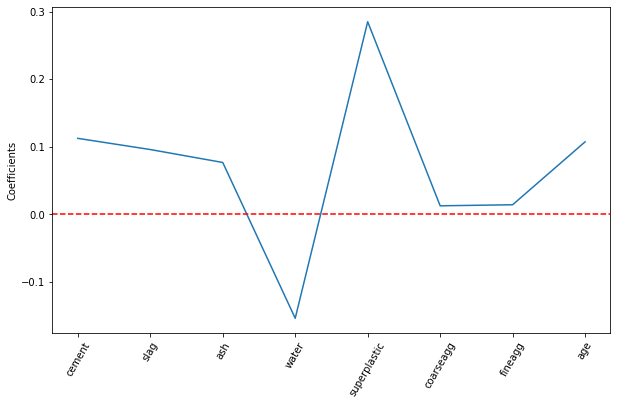

In [61]:
# Building lasso regression model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

# Fitting model to training data

lasso.fit(X_train, y_train)

# Extracting coefficients

lasso_coef = lasso.coef_

# Plotting coefficients

plt.figure(figsize=(10, 6))
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=60)
plt.axhline(0.0, linestyle='--', color='r')
plt.ylabel('Coefficients')

### Observations: the coefficients for variables "coarseagg" and "fineagg" are close to zero, so they will be dropped for the purposes of model building.

In [62]:
# Creating a list of columns to drop

cols_to_drop = ['coarseagg', 'fineagg']

# Dropping columns from training, validation, and test data

X_train_1.drop(columns=cols_to_drop, inplace=True)
X_train.drop(columns=cols_to_drop, inplace=True)
X_val.drop(columns=cols_to_drop, inplace=True)
X_test.drop(columns=cols_to_drop, inplace=True)

C:\Users\William\Anaconda3\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Creating and Tuning the Models

In [65]:
# Building linear regression model

model = LinearRegression()

In [66]:
# Fitting lr model to training data

mlr = model.fit(X_train, y_train)

# Evaluating performance

scoring(mlr, X_val, y_val)

Model Performance
Mean Absolute Error: 7.5868.
Mean Squared Error: 89.2328.
R^2 Score: 7.5868.
Accuracy: 69.15.


In [67]:
# Building Random Forest model

rf_model = RandomForestRegressor(random_state=7)

# Fitting model to training data

rf = rf_model.fit(X_train, y_train)

# Evaluating performance

scoring(rf, X_val, y_val)

Model Performance
Mean Absolute Error: 3.3699.
Mean Squared Error: 19.9148.
R^2 Score: 3.3699.
Accuracy: 87.69.


In [68]:
# Building Bagging model

bg_model = BaggingRegressor(random_state=7)

# Fitting model to training data

bg = bg_model.fit(X_train, y_train)

# Evaluating performance

scoring(bg, X_val, y_val)

Model Performance
Mean Absolute Error: 3.6965.
Mean Squared Error: 24.2345.
R^2 Score: 3.6965.
Accuracy: 86.95.


In [69]:
# Building Boosting model

ab_model = AdaBoostRegressor(random_state=7)

# Fitting model to training data

ab = ab_model.fit(X_train, y_train)

# Evaluating performance

scoring(ab, X_val, y_val)

Model Performance
Mean Absolute Error: 6.2966.
Mean Squared Error: 56.7012.
R^2 Score: 6.2966.
Accuracy: 72.94.


In [71]:
# Importing KFold and Cross-Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [77]:
# Defining a function that compares the cross-validation performance of the previously run models

def cv_comparison(models, X, y, cv):
    # Creating a dataframe to contain all averages and measures
    cv_accuracies = pd.DataFrame()
    maes = []
    mses = []
    r2s = []
    accs = []
    # Loop through the models, run a CV on each model, and add the average scores and CV scores to the dataframe
    for model in models:
        mae = -np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 4)
        maes.append(mae)
        mae_avg = round(mae.mean(), 4)
        mse = -np.round(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv), 4)
        mses.append(mse)
        mse_avg = round(mse.mean(), 4)
        r2 = np.round(cross_val_score(model, X, y, scoring='r2', cv=cv), 4)
        r2s.append(r2)
        r2_avg = round(r2.mean(), 4)
        acc = np.round((100 - (100 * (mae * len(X))) / sum(y)), 4)
        accs.append(acc)
        acc_avg = round(acc.mean(), 4)
        cv_accuracies[str(model)] = [mae_avg, mse_avg, r2_avg, acc_avg]
    cv_accuracies.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2 Error', 'Accuracy']
    return cv_accuracies, maes, mses, r2s, accs

In [129]:
# Create models to be tested

lr2 = LinearRegression()
rf2 = RandomForestRegressor(random_state=7)
bg2 = BaggingRegressor(random_state=7)
ab2 = AdaBoostRegressor(random_state=7)

# Putting models in a list to be used for Cross-Validation

models = [lr2, rf2, bg2, ab2]

# Running cross-validation on models

comp, maes, mses, r2s, accs = cv_comparison(models, X_train_1, y_train_1, 4)
comp.columns = ['Linear Regression', 'Random Forest', 'Bagging', 'AdaBoost']
comp

,Linear Regression,Random Forest,Bagging,AdaBoost
Mean Absolute Error,8.3946,4.1007,4.3194,6.5113
Mean Squared Error,111.7545,33.0355,35.7156,66.0780
R^2 Error,0.5750,0.8756,0.8653,0.7493
Accuracy,76.1917,88.3700,87.7498,81.5333


In [98]:
# Creating hyperparameter grid for Random Forest

# Number of trees in Random Forest

rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)

# Max number of levels in tree

rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]

# Adding default as possible value

rf_max_depth.append(None)

# Number of features to consider at every split

rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on

rf_criterion = ['mse', 'mae']

# Minimum number of samples required to split a node

rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen

rf_min_impurity_decrease = [0.0, 0.5, 0.1]

# Method of selecting samples for training each tree

rf_bootstrap = [True, False]

# Creating the grid

rf_grid = {'n_estimators': rf_n_estimators,
           'max_depth': rf_max_depth,
           'max_features': rf_max_features,
           'criterion': rf_criterion,
           'min_samples_split': rf_min_samples_split,
           'min_impurity_decrease': rf_min_impurity_decrease,
           'bootstrap': rf_bootstrap}

In [99]:
rf_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1500, 2000],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'criterion': ['mse', 'mae'],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_impurity_decrease': [0.0, 0.5, 0.1],
 'bootstrap': [True, False]}

In [100]:
# Hyperparameter Tuning for Random Forest using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating model to be tuned

rf_3 = RandomForestRegressor()

# Creating randomized Random Forest

rf_random = RandomizedSearchCV(estimator=rf_3, param_distributions=rf_grid, n_iter=200, cv=5, verbose=2, random_state=7, n_jobs=-1)

# Fitting the random search model

rf_random.fit(X_train_1, y_train_1)

# View best parameters

rf_random.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 27.0min finished


{'n_estimators': 200,
 'min_samples_split': 4,
 'min_impurity_decrease': 0.0,
 'max_features': 'log2',
 'max_depth': 25,
 'criterion': 'mse',
 'bootstrap': False}

In [119]:
# Creating hyperparameter grid for Bagging

# Number of estimators

bg_n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]

# Max number of samples

bg_max_samples = [int(x) for x in np.linspace(5, 55, 11)]

# Max number of features

bg_max_features = [int(x) for x in np.linspace(3, 33, 11)]

# Method of selecting samples

bg_bootstrap = [True, False]

bg_grid = {'n_estimators': bg_n_estimators,
           'max_samples': bg_max_samples,
           'max_features': bg_max_features,
           'bootstrap': bg_bootstrap}

bg_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_samples': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55],
 'max_features': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33],
 'bootstrap': [True, False]}

In [120]:
# Creating model to be tuned

bg_3 = BaggingRegressor()

# Creating random search Bagging

bg_random = RandomizedSearchCV(estimator=bg_3, param_distributions=bg_grid, n_iter=200, cv=5, verbose=2, random_state=7, n_jobs=-1)

# Fitting random search model

bg_random.fit(X_train_1, y_train_1)

bg_random.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 499 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.7min finished


{'n_estimators': 2000, 'max_samples': 55, 'max_features': 6, 'bootstrap': True}

In [113]:
# Creating hyperparameter grid for AdaBoost

# Number of trees in Random Forest

ab_n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]

# Learning rate

ab_learning_rate = [x for x in np.linspace(0.1, 0.6, 6)]

# Minimum loss function to update the weights

ab_loss = ['linear', 'square', 'exponential']

# Creating the grid

ab_grid = {'n_estimators': ab_n_estimators,
           'learning_rate': ab_learning_rate,
           'loss': ab_loss}
ab_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6],
 'loss': ['linear', 'square', 'exponential']}

In [114]:
# Creating model to be tuned

ab_3 = AdaBoostRegressor()

# Creating random search AdaBoost

ab_random = RandomizedSearchCV(estimator=ab_3, param_distributions=ab_grid, n_iter=200, cv=5, verbose=2, random_state=7, n_jobs=-1)

# Fitting the model

ab_random.fit(X_train_1, y_train_1)

# Get best parameters

ab_random.best_params_

C:\Users\William\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 180 is smaller than n_iter=200. Running 180 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  7.8min finished


{'n_estimators': 200, 'loss': 'linear', 'learning_rate': 0.5}

In [121]:
## Final model evaluation

# Creating the final linear regression
lr_final = LinearRegression()

# Creating the final Random Forest
rf_final = RandomForestRegressor(n_estimators=200,
                                 min_samples_split=4,
                                 min_impurity_decrease=0.0,
                                 max_features='log2',
                                 max_depth=25,
                                 criterion='mse',
                                 bootstrap=False)

# Creating the final Bagging
bg_final = BaggingRegressor(n_estimators=2000,
                            max_samples=55,
                            max_features=6,
                            bootstrap=True)

# Creating the final AdaBoost
ab_final = AdaBoostRegressor(n_estimators=200, 
                             loss='linear', 
                             learning_rate=0.5)

# Training models using 80% of data

lr_final.fit(X_train_1, y_train_1)
rf_final.fit(X_train_1, y_train_1)
bg_final.fit(X_train_1, y_train_1)
ab_final.fit(X_train_1, y_train_1)

AdaBoostRegressor(learning_rate=0.5, n_estimators=200)

In [118]:
# Defining function that compares all final models

def final_comparison(models, test_features, test_labels):
    scores = pd.DataFrame()
    for model in models:
        predictions = model.predict(test_features)
        mae = round(mean_absolute_error(test_labels, predictions), 4)
        mse = round(mean_squared_error(test_labels, predictions), 4)
        r2 = round(r2_score(test_labels, predictions), 4)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = round(100 - mape, 4)
        scores[str(model)] = [mae, mse, r2, accuracy]
    scores.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2 Error', 'Accuracy']
    return scores    

In [122]:
# Calling final comparison on all four models

final_scores = final_comparison([lr_final, rf_final, bg_final, ab_final], X_test, y_test)

# Adjusting column headers

final_scores.columns = ['Linear Regression', 'Random Forest', 'Bagging', 'AdaBoost']

In [131]:
comp

,Linear Regression,Random Forest,Bagging,AdaBoost
Mean Absolute Error,8.3946,4.1007,4.3194,6.5113
Mean Squared Error,111.7545,33.0355,35.7156,66.0780
R^2 Error,0.5750,0.8756,0.8653,0.7493
Accuracy,76.1917,88.3700,87.7498,81.5333


In [130]:
final_scores

,Linear Regression,Random Forest,Bagging,AdaBoost
Mean Absolute Error,7.7420,2.9699,5.7185,6.1123
Mean Squared Error,90.6942,17.0130,51.5631,53.2722
R^2 Error,0.6591,0.9360,0.8062,0.7997
Accuracy,68.4477,88.2229,77.7341,72.3705


# Conclusion

### The model with the best performance is the Random Forest Regressor.

### The Mean Absolute Error, Mean Squared Error, and R-Squared errors of all except one model (Bagging) decreased, although the accuracy went down slightly in every model. Perhaps further hyperparameter tuning might improve the models, but the Random Forest Regressor did produce almost 88.2% accuracy, meaning the model was off by 11.8%.

#### Note: this analysis was inspired in large measure by the following article by Jonas Benner:

#### Cross-Validation and Hyperparameter Tuning: How to Optimize Your Machine Learning Model
#### https://towardsdatascience.com/cross-validation-and-hyperparameter-tuning-how-to-optimise-your-machine-learning-model-13f005af9d7d